In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings;
warnings.filterwarnings("ignore")

In [107]:
df1=pd.read_excel('man_2017.xlsx')

In [108]:
df1.head()

,From Date,To Date,BP,CH4,PM2.5,RH,SR,Temp,THC,VWS,WD,WS,CO,NH3,NOx,NO,NO2,SO2
0,01-01-2017 00:00,01-01-2017 01:00,1004.58,None,71.93,87.07,None,None,3441.88,0.23,338.53,0.13,481.72,172.02,None,7.95,32.01,22.06
1,01-01-2017 01:00,01-01-2017 02:00,1003.03,None,97.55,91.59,None,None,3142.55,0.22,333.24,0.12,328.12,100.31,None,2.36,23.36,11.76
2,01-01-2017 02:00,01-01-2017 03:00,1002.65,None,78.58,94.37,None,None,3112,0.23,314.88,0.16,334.27,231.6,None,2.83,21.54,8.12
3,01-01-2017 03:00,01-01-2017 04:00,1002.25,None,81.77,93.5,None,None,2999.72,0.22,315.32,0.39,184.85,275.26,None,2.21,17.59,6.14
4,01-01-2017 04:00,01-01-2017 05:00,1002.15,None,62.45,93.63,None,None,3000.38,0.23,335.61,0.4,548.73,32.42,None,2.79,17.88,10.13


In [109]:
df=df1[['From Date','BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']]

In [110]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,1004.58,481.72,0.23,338.53,0.13,7.95,32.01,71.93,87.07,22.06,None
1,01-01-2017 01:00,1003.03,328.12,0.22,333.24,0.12,2.36,23.36,97.55,91.59,11.76,None
2,01-01-2017 02:00,1002.65,334.27,0.23,314.88,0.16,2.83,21.54,78.58,94.37,8.12,None
3,01-01-2017 03:00,1002.25,184.85,0.22,315.32,0.39,2.21,17.59,81.77,93.5,6.14,None
4,01-01-2017 04:00,1002.15,548.73,0.23,335.61,0.4,2.79,17.88,62.45,93.63,10.13,None


In [111]:
df.shape

(8737, 12)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 12 columns):
From Date    8737 non-null object
BP           8737 non-null object
CO           8737 non-null object
VWS          8737 non-null object
WD           8737 non-null object
WS           8737 non-null object
NO           8737 non-null object
NO2          8737 non-null object
PM2.5        8737 non-null object
RH           8737 non-null object
SO2          8737 non-null object
SR           8737 non-null object
dtypes: object(12)
memory usage: 819.2+ KB


In [113]:
for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan)

In [114]:
print("Percentage of Null values in Maneli 2017: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Maneli 2017:  7.241234596161917


In [115]:
df.isna().sum()

From Date       0
BP            412
CO            460
VWS           410
WD            416
WS            415
NO            399
NO2           395
PM2.5         407
RH            413
SO2           475
SR           3390
dtype: int64

In [116]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [117]:
count/(len(df)*12)

0.0003147533478310633

In [118]:
for col in list1:
    if(col!='VWS'):
        for j in df[col]:
            if(j<0):
                df[col]=df[col].replace(j,np.nan)

In [119]:
print("Percentage of Null values in Maneli 2017: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Maneli 2017:  7.263171950707719


In [120]:
df.isna().sum()

From Date       0
BP            412
CO            460
VWS           410
WD            416
WS            415
NO            399
NO2           396
PM2.5         411
RH            418
SO2           475
SR           3403
dtype: int64

In [121]:
df=df.dropna(axis=0,subset=['PM2.5'])

In [122]:
m=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
for col in m:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [123]:
df.isna().sum()

From Date       0
BP              0
CO              0
VWS             0
WD              0
WS              0
NO              0
NO2             0
PM2.5           0
RH              0
SO2             0
SR           1047
dtype: int64

In [124]:
df['SR'] = df['SR'].interpolate(method='nearest',limit_direction = 'both')

In [125]:
df['BP']=df['BP'].astype(float)
df['CO']=df['CO'].astype(float)
df['VWS']=df['VWS'].astype(float)
df['WD']=df['WD'].astype(float)
df['WS']=df['WS'].astype(float)
df['NO']=df['NO'].astype(float)
df['NO2']=df['NO2'].astype(float)
df['PM2.5']=df['PM2.5'].astype(float)
df['RH']=df['RH'].astype(float)
df['SO2']=df['SO2'].astype(float)
df['SR']=df['SR'].astype(float)

In [126]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2017 00:00,1004.58,481.72,0.23,338.53,0.13,7.95,32.01,71.93,87.07,22.06,NaN
1,01-01-2017 01:00,1003.03,328.12,0.22,333.24,0.12,2.36,23.36,97.55,91.59,11.76,NaN
2,01-01-2017 02:00,1002.65,334.27,0.23,314.88,0.16,2.83,21.54,78.58,94.37,8.12,NaN
3,01-01-2017 03:00,1002.25,184.85,0.22,315.32,0.39,2.21,17.59,81.77,93.50,6.14,NaN
4,01-01-2017 04:00,1002.15,548.73,0.23,335.61,0.40,2.79,17.88,62.45,93.63,10.13,NaN


In [127]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,7279.000000
mean,986.506892,406.641924,0.220586,170.088688,1.153397,8.724676,23.936095,62.916929,73.637342,14.055985,134.231111
std,157.635143,340.721088,0.042056,90.552094,0.657170,10.840582,14.611566,77.718206,19.914843,36.283121,201.068622
min,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1010.730000,224.745000,0.220000,105.222500,0.680000,3.690000,15.940000,25.720000,62.260000,4.050000,1.660000
50%,1012.800000,422.050000,0.230000,181.980000,0.970000,5.640000,21.225000,43.850000,75.500000,8.060000,16.210000
75%,1014.620000,569.895000,0.230000,237.150000,1.510000,10.850000,28.837500,70.827500,88.780000,13.165000,232.615000
max,1024.530000,7075.580000,0.340000,359.430000,4.040000,276.170000,336.500000,999.990000,100.000000,936.280000,1403.700000


In [128]:
df['CO'][df['CO']>100]

0       481.72
1       328.12
2       334.27
3       184.85
4       548.73
         ...  
7092    191.24
7093    187.90
7095    634.99
7096    149.38
7098    190.33
Name: CO, Length: 6475, dtype: float64

In [129]:
df['CO'] = np.where((df.CO >100),df['CO']/1000,df.CO)


In [130]:
df.isna().sum()

From Date       0
BP              0
CO              0
VWS             0
WD              0
WS              0
NO              0
NO2             0
PM2.5           0
RH              0
SO2             0
SR           1047
dtype: int64

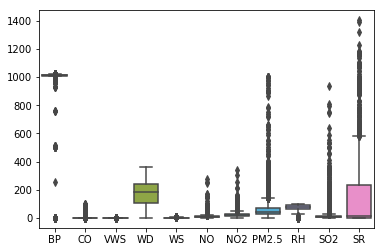

In [131]:
sns.boxplot(data=df)

In [132]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,7279.000000
mean,986.506892,0.849720,0.220586,170.088688,1.153397,8.724676,23.936095,62.916929,73.637342,14.055985,134.231111
std,157.635143,4.937531,0.042056,90.552094,0.657170,10.840582,14.611566,77.718206,19.914843,36.283121,201.068622
min,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1010.730000,0.354352,0.220000,105.222500,0.680000,3.690000,15.940000,25.720000,62.260000,4.050000,1.660000
50%,1012.800000,0.482210,0.230000,181.980000,0.970000,5.640000,21.225000,43.850000,75.500000,8.060000,16.210000
75%,1014.620000,0.640090,0.230000,237.150000,1.510000,10.850000,28.837500,70.827500,88.780000,13.165000,232.615000
max,1024.530000,98.950000,0.340000,359.430000,4.040000,276.170000,336.500000,999.990000,100.000000,936.280000,1403.700000


In [133]:
df.shape

(8326, 12)

In [134]:
df['location']=2
df['location']=df['location'].astype('category')

In [135]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR,location
0,01-01-2017 00:00,1004.58,0.48172,0.23,338.53,0.13,7.95,32.01,71.93,87.07,22.06,NaN,2
1,01-01-2017 01:00,1003.03,0.32812,0.22,333.24,0.12,2.36,23.36,97.55,91.59,11.76,NaN,2
2,01-01-2017 02:00,1002.65,0.33427,0.23,314.88,0.16,2.83,21.54,78.58,94.37,8.12,NaN,2
3,01-01-2017 03:00,1002.25,0.18485,0.22,315.32,0.39,2.21,17.59,81.77,93.50,6.14,NaN,2
4,01-01-2017 04:00,1002.15,0.54873,0.23,335.61,0.40,2.79,17.88,62.45,93.63,10.13,NaN,2


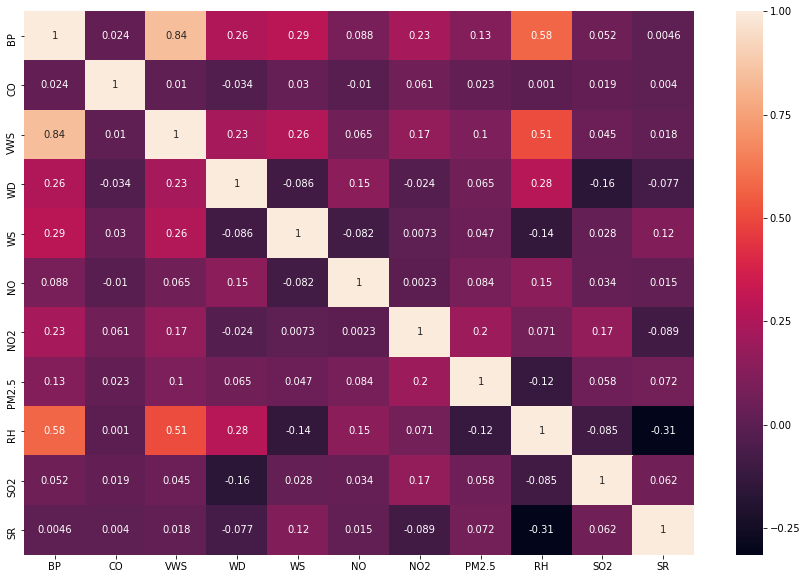

In [136]:
m=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(m,annot=True)

In [137]:
df.columns

Index(['From Date', 'BP', 'CO', 'VWS', 'WD', 'WS', 'NO', 'NO2', 'PM2.5', 'RH',
       'SO2', 'SR', 'location'],
      dtype='object')

In [138]:
"""iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)
up_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)
low_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)

iqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)
up_co=df['CO'].quantile(.75)+(1.5*iqr_co)
low_co=df['CO'].quantile(.25)-(1.5*iqr_co)

iqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)
up_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)
low_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)


iqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)
up_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)
low_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)


iqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)
up_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)
low_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)

iqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)
up_no=df['NO'].quantile(.75)+(1.5*iqr_no)
low_no=df['NO'].quantile(.25)-(1.5*iqr_no)

iqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)
up_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)
low_no2=df['NO2'].quantile(.25)-(1.5*iqr_no2)


iqr_pm=df['PM2.5'].quantile(.75)-df['PM2.5'].quantile(.25)
up_pm=df['PM2.5'].quantile(.75)+(1.5*iqr_pm)
low_pm=df['PM2.5'].quantile(.25)-(1.5*iqr_pm)

iqr_rh=df['RH'].quantile(.75)-df['RH'].quantile(.25)
up_rh=df['RH'].quantile(.75)+(1.5*iqr_rh)
low_rh=df['RH'].quantile(.25)-(1.5*iqr_rh)

iqr_so2=df['SO2'].quantile(.75)-df['SO2'].quantile(.25)
up_so2=df['SO2'].quantile(.75)+(1.5*iqr_so2)
low_so2=df['SO2'].quantile(.25)-(1.5*iqr_so2)

iqr_sr=df['SR'].quantile(.75)-df['SR'].quantile(.25)
up_sr=df['SR'].quantile(.75)+(1.5*iqr_sr)
low_sr=df['SR'].quantile(.25)-(1.5*iqr_sr)
"""

"iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)\nup_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)\nlow_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)\n\niqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)\nup_co=df['CO'].quantile(.75)+(1.5*iqr_co)\nlow_co=df['CO'].quantile(.25)-(1.5*iqr_co)\n\niqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)\nup_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)\nlow_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)\n\n\niqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)\nup_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)\nlow_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)\n\n\niqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)\nup_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)\nlow_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)\n\niqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)\nup_no=df['NO'].quantile(.75)+(1.5*iqr_no)\nlow_no=df['NO'].quantile(.25)-(1.5*iqr_no)\n\niqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)\nup_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)\nlow_no2=df['NO2'].quantil

In [139]:
"""for i in df['CO']:
    if(i>up_co):
        df['CO']=df['CO'].replace(i,up_co)

for i in df['NO2']:
    if(i>up_no2):
        df['NO2']=df['NO2'].replace(i,up_no2)
for i in df['NO']:
    if(i>up_no):
        df['NO']=df['NO'].replace(i,up_no)

for i in df['SO2']:
    if(i>up_so2):
        df['SO2']=df['SO2'].replace(i,up_so2)
        
for i in df['RH']:
    if(i>up_rh):
        df['RH']=df['RH'].replace(i,up_rh)
        
for i in df['VWS']:
    if(i>up_vws):
        df['VWS']=df['VWS'].replace(i,up_vws)
        
for i in df['WS']:
    if(i>up_ws):
        df['WS']=df['WS'].replace(i,up_ws)
        
for i in df['WD']:
    if(i>up_wd):
        df['WD']=df['WD'].replace(i,up_wd)
        
for i in df['PM2.5']:
    if(i>up_pm):
        df['PM2.5']=df['PM2.5'].replace(i,up_pm)
        
for i in df['SR']:
    if(i>up_sr):
        df['SR']=df['SR'].replace(i,up_sr)

for i in df['BP']:
    if(i<low_bp):
        df['BP']=df['BP'].replace(i,low_bp)
    elif(i>up_bp):
        df['BP']=df['BP'].replace(i,up_bp)"""

"for i in df['CO']:\n    if(i>up_co):\n        df['CO']=df['CO'].replace(i,up_co)\n\nfor i in df['NO2']:\n    if(i>up_no2):\n        df['NO2']=df['NO2'].replace(i,up_no2)\nfor i in df['NO']:\n    if(i>up_no):\n        df['NO']=df['NO'].replace(i,up_no)\n\nfor i in df['SO2']:\n    if(i>up_so2):\n        df['SO2']=df['SO2'].replace(i,up_so2)\n        \nfor i in df['RH']:\n    if(i>up_rh):\n        df['RH']=df['RH'].replace(i,up_rh)\n        \nfor i in df['VWS']:\n    if(i>up_vws):\n        df['VWS']=df['VWS'].replace(i,up_vws)\n        \nfor i in df['WS']:\n    if(i>up_ws):\n        df['WS']=df['WS'].replace(i,up_ws)\n        \nfor i in df['WD']:\n    if(i>up_wd):\n        df['WD']=df['WD'].replace(i,up_wd)\n        \nfor i in df['PM2.5']:\n    if(i>up_pm):\n        df['PM2.5']=df['PM2.5'].replace(i,up_pm)\n        \nfor i in df['SR']:\n    if(i>up_sr):\n        df['SR']=df['SR'].replace(i,up_sr)\n\nfor i in df['BP']:\n    if(i<low_bp):\n        df['BP']=df['BP'].replace(i,low_bp)\n    e

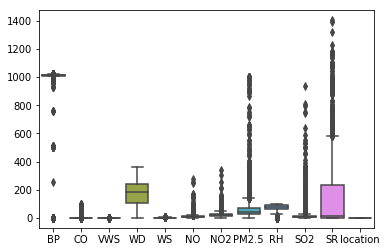

In [140]:
sns.boxplot(data=df)

In [141]:
result_csv1 = df.to_csv (r'C:\dse_new\eda_man_17.csv', index = None, header=True)

# Upto this basic EDA is done

# ---------------------------------------------------------------------------------------------------------------